In [1]:
import sys
if sys.platform == "darwin":  # michael's config
    # because Michael is using jupyter lab
    %load_ext lab_black
else:  # zade's config
    # because Zade is using jupyter notebook
    %load_ext nb_black

In [2]:
import numpy as np
import geopandas as gp
import shapely
from planet4 import io, markings

<IPython.core.display.Javascript object>

In [3]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [5]:
# describe using it by saying "I am using the inline backend"
%matplotlib inline

<IPython.core.display.Javascript object>

In [6]:
# the `which` setting is by default 'both'
cc = CoverageCalculator()

Reading fans and blotches in...
Done.
Reading metadata...
Done.
Note that obsid must be set to a string value before this works.


<IPython.core.display.Javascript object>

In [7]:
all_regions = get_region_names().roi_name.unique()

<IPython.core.display.Javascript object>

In [8]:
all_regions = [
    region for region in all_regions if region not in ["unknown", "Manhattan2"]
]

<IPython.core.display.Javascript object>

In [9]:
all_regions

['Macclesfield',
 'Starburst',
 'Manhattan_Classic',
 'Wellington',
 'Albany',
 'Bilbao',
 'Ithaca',
 'Portsmouth',
 'Pisaq',
 'Manhattan_Frontinella',
 'BuenosAires',
 'Inca_City_Ridges',
 'Inca_City',
 'Giza',
 'Potsdam',
 'Troy',
 'Oswego_Edge',
 'Halifax',
 'Caterpillar',
 'Rochester',
 'Manhattan_Cracks',
 'Schenectady',
 'Binghamton',
 'Atka',
 'Cortland',
 'Geneseo']

<IPython.core.display.Javascript object>

In [10]:
data = pd.read_csv("n_obj_df.csv")

<IPython.core.display.Javascript object>

In [11]:
data.head()

,Latitude,Ls,MY,Which,fraction,n_objects,obsid,pixel_area,region_name
0,-85.4074,214.785,29,both,0.115,933,ESP_012079_0945,2.551911e+07,Macclesfield
1,-85.4065,183.727,29,both,0.070,1971,ESP_011407_0945,2.592302e+06,Macclesfield
2,-85.4056,198.040,29,both,0.072,1525,ESP_011723_0945,8.455380e+06,Macclesfield
3,-85.4049,207.892,29,both,0.168,788,ESP_011934_0945,7.357966e+06,Macclesfield
4,-85.4067,235.282,29,both,0.111,1285,ESP_012501_0945,4.882627e+06,Macclesfield


<IPython.core.display.Javascript object>

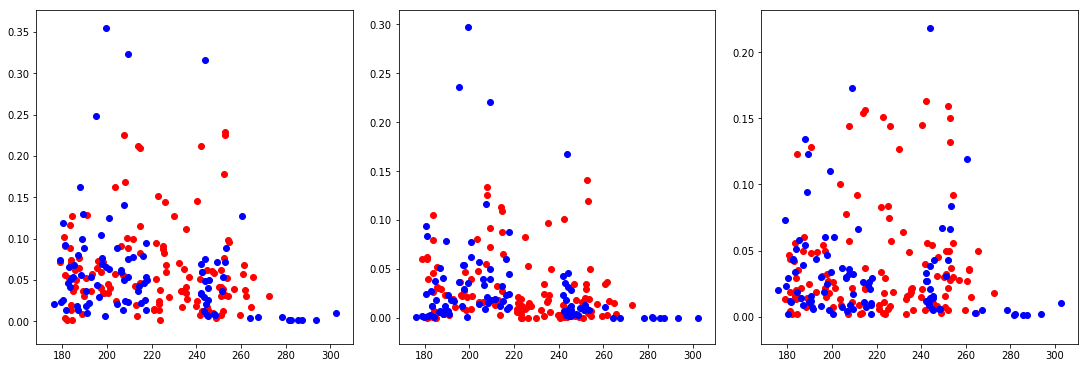

<IPython.core.display.Javascript object>

In [12]:
# not quite right, first off the n_objects hides all data, find a better way to display that
# secondly, it keeps old data for next plot.  Need to find a way to clear after every savefig
# think i fixed above with plt.clf- try with next trial (trial2)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True)
for region in all_regions:
    for ax, select in zip(axes, ["both", "fans", "blotches"]):
        df1 = data.loc[data["region_name"] == region]
        subdf = df1.loc[df1["Which"] == select]
        for year in [29, 30]:
            ax2 = ax.twinx()
            subdf2 = subdf.loc[subdf["MY"] == year]
            ax.scatter("Ls", "fraction", data=data)
            ax2.scatter("Ls", "n_objects", data=data, color="k")
        # fig.savefig(f"{region}.trial1.png")

In [ ]:
# now need a way to make 2ndary axis better, how to display (log plot?)
# make data more clear, maybe change colors/shapes
# how to share 2ndary y axis
# move legends up above plot so that they don't interfere with data

for region in all_regions[:1]:
    fig, axes = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True)
    fig.suptitle(region)
    df1 = data.loc[data["region_name"] == region]
    max_nobs = df1.n_objects.max()
    min_nobs = df1.n_objects.min()
    max_frac = df1.fraction.max()
    min_frac = df1.fraction.min()
    for ax, select in zip(axes, ["both", "fans", "blotches"]):
        # make a legend thats one box at the bottom, show 4 variables, 29 (fraction), 30(fraction)
        # 29(n_obj), 30(n_obj) with their respective colors and shapes
        # look at https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
        # put it below
        ax.set_xlabel("Ls [deg]")
        ax.set_ylabel("Fractional Coverage")
        ax.set_title(select)
        subdf = df1[df1["Which"] == select]
        ax2 = ax.twinx()
        ax2.set_ylabel("Number of Objects")
        for year in [29, 30]:
            subdf2 = subdf[subdf["MY"] == year]
            ax.scatter("Ls", "fraction", data=subdf2, label=year, s=50)
            ax2.scatter(
                "Ls", "n_objects", data=subdf2, marker="*", label=year, s=50
            )
            for a, l, t in zip(
                [ax, ax2], ["left", "right"], ["fractions", "n_objects"]
            ):
                a.legend(
                    loc=f"upper {l}", fancybox=True, framealpha=0.5, title=t
                )

            ax.set_ylim([0, max_frac * 1.1])
            ax2.set_ylim([0, max_nobs * 1.1])
            # fig.savefig(f"{region}.trial4.png", dpi=150)

FigureCanvasNbAgg()

In [14]:
region

'Macclesfield'

<IPython.core.display.Javascript object>

In [14]:
trialregions = all_regions[0:3]

<IPython.core.display.Javascript object>

In [15]:
trialregions

['Macclesfield', 'Starburst', 'Manhattan_Classic']

<IPython.core.display.Javascript object>

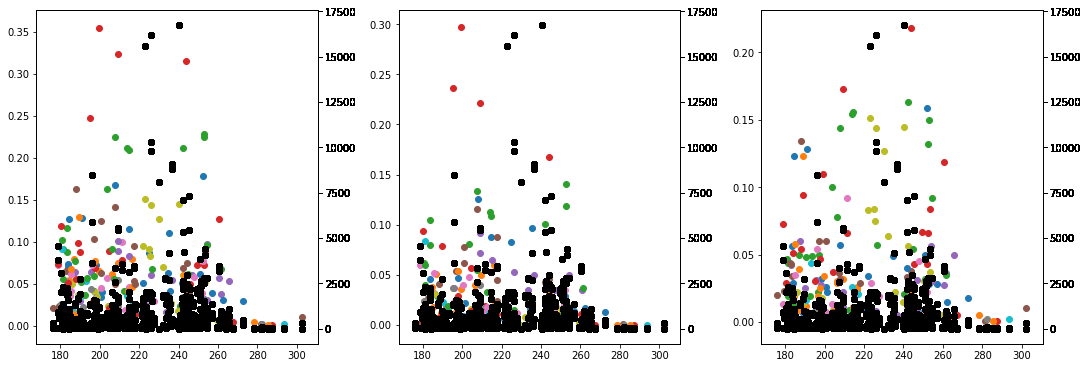

<IPython.core.display.Javascript object>

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True)
for region in all_regions:
    for ax, select in zip(axes, ["both", "fans", "blotches"]):
        df1 = data.loc[data["region_name"] == region]
        subdf = df1.loc[df1["Which"] == select]
        for year in [29, 30]:
            subdf2 = subdf.loc[subdf["MY"] == year]
            ax.scatter("Ls", "fraction", data=subdf2)
            ax2 = ax.twinx()
            ax2.scatter("Ls", "n_objects", data=subdf2, color="k")
        # fig.savefig(f"{region}.trial2.png")
        # plt.clf()

In [13]:
# as above but with plt.close()
fig, axes = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True)
for region in all_regions:
    for ax, select in zip(axes, ["both", "fans", "blotches"]):
        df1 = data.loc[data["region_name"] == region]
        subdf = df1.loc[df1["Which"] == select]
        for year in [29, 30]:
            subdf2 = subdf.loc[subdf["MY"] == year]
            ax.scatter("Ls", "fraction", data=subdf2)
            ax2 = ax.twinx()
            ax2.scatter("Ls", "n_objects", data=subdf2, color="k")
            # fig.savefig(f"{region}.trial3.png")
            plt.close()

<IPython.core.display.Javascript object>